In [2]:
import pandas as pd
import numpy as np

In [26]:
data = pd.read_csv('./data/2020가계부채/label_2020.csv', engine='python', encoding='cp949')
data

,Unnamed: 0,Unnamed: 0.1,조사연도,가구고유번호(MD제공용),가중치,수도권여부,가구주 성별,가구원수,노인가구,조손가구,...,가구주 미은퇴시_최소생활비,가구주 미은퇴시_적정생활비,가구주 미은퇴시_노후준비상황,가구주 은퇴시_가구주 은퇴실제 연령,가구주 은퇴시_적정생활비 충당여부,가구주 은퇴시_생활비 재원마련(2014년~),DTA,DSR,HDRI,부실가계
0,0,1,2020,10000112,1531.602344,수도권,남자,3,그 외 가구,그 외 가구,...,400,500,보통이다,NaN,NaN,NaN,0.326531,0.121766,104.829621,0
1,1,2,2020,10000132,1314.119926,수도권,여자,2,그 외 가구,그 외 가구,...,500,700,보통이다,NaN,NaN,NaN,0.450980,0.347382,139.836192,1
2,2,3,2020,10000162,1098.806050,수도권,여자,1,노인가구,그 외 가구,...,100,150,보통이다,NaN,NaN,NaN,0.000000,0.000000,60.000000,0
3,3,4,2020,10000182,1124.027871,수도권,남자,2,그 외 가구,그 외 가구,...,200,250,잘 되어 있지 않다,NaN,NaN,NaN,0.000000,0.020568,62.056767,0
4,4,5,2020,10000192,1098.806050,수도권,여자,1,그 외 가구,그 외 가구,...,250,300,보통이다,NaN,NaN,NaN,0.000000,0.000000,60.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18059,18059,18060,2020,993800291,601.643255,비수도권,남자,3,그 외 가구,그 외 가구,...,400,500,보통이다,NaN,NaN,NaN,0.328113,-7.743590,-681.547640,0
18060,18060,18061,2020,994800251,384.069810,비수도권,남자,5,그 외 가구,그 외 가구,...,300,600,잘 되어 있다,NaN,NaN,NaN,1.762821,0.466735,282.955507,0
18061,18061,18062,2020,994800261,359.114694,비수도권,남자,5,그 외 가구,그 외 가구,...,0,0,NaN,56.0,보통이다,"국민연금, 공무원연금 등 공적 연금",1.012658,1.176471,278.912882,0
18062,18062,18063,2020,994800291,416.635211,비수도권,여자,2,그 외 가구,그 외 가구,...,200,300,보통이다,NaN,NaN,NaN,0.000000,0.000000,60.000000,0


In [27]:
# 담보대출 용도 및 출처
df_1 = data.iloc[:,51:64]

# 신용대출 용도 및 출처
df_2 = data.iloc[:,75:88]
df_2

# 가구주 직업은 상용근로자 or not, 입주형태는 자가 or not
df_3 = data[['가구주 성별','가구주교육정도 통합별','가구주 혼인상태','입주형태','수도권여부','가구주 직업(대분류)','부실가계']]

df = pd.concat([df_1,df_2,df_3],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18064 entries, 0 to 18063
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   담보대출                                 18064 non-null  float64
 1   담보대출_대출용도_거주주택 구입                    18064 non-null  int64  
 2   담보대출_대출용도_거주주택이외 부동산 구입              18064 non-null  float64
 3   담보대출_대출용도_전(월)세 보증금 마련               18064 non-null  int64  
 4   담보대출_대출용도_부채상환                       18064 non-null  int64  
 5   담보대출_대출용도_사업자금 마련                    18064 non-null  float64
 6   담보대출_대출용도_생활비 마련                     18064 non-null  int64  
 7   담보대출_대출용도_기타 용도 등                    18064 non-null  float64
 8   담보대출_대출기관_은행(2010년은 농수협 중앙회 제외)      18064 non-null  float64
 9   담보대출_대출기관_저축은행                       18064 non-null  int64  
 10  담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함)  18064 non-null  float64
 11  담보대출_대출기관_보험회사              

In [704]:
# df['HDRI'] = data['HDRI']
# df.drop(['금융부채',''])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18064 entries, 0 to 18063
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   담보대출                                 18064 non-null  float64
 1   담보대출_대출용도_거주주택 구입                    18064 non-null  int64  
 2   담보대출_대출용도_거주주택이외 부동산 구입              18064 non-null  float64
 3   담보대출_대출용도_전(월)세 보증금 마련               18064 non-null  int64  
 4   담보대출_대출용도_부채상환                       18064 non-null  int64  
 5   담보대출_대출용도_사업자금 마련                    18064 non-null  float64
 6   담보대출_대출용도_생활비 마련                     18064 non-null  int64  
 7   담보대출_대출용도_기타 용도 등                    18064 non-null  float64
 8   담보대출_대출기관_은행(2010년은 농수협 중앙회 제외)      18064 non-null  float64
 9   담보대출_대출기관_저축은행                       18064 non-null  int64  
 10  담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함)  18064 non-null  float64
 11  담보대출_대출기관_보험회사              

In [29]:
# 가구주직업 인코딩(단순노무 종사자=1, or 0)
for i in range(len(df['가구주 직업(대분류)'])):
    if df['가구주 직업(대분류)'][i]=='단순노무 종사자':
        df['가구주 직업(대분류)'][i]=1
    else:
        df['가구주 직업(대분류)'][i]=0
        
# 입주형태 인코딩(자기집 =1 , or 0)
for i in range(len(df['입주형태'])):
    if df['입주형태'][i]=='자기집':
        df['입주형태'][i]=1
    else:
        df['입주형태'][i]=0
        
# 가구주 혼인상태 인코딩(배우자있음 =1 , or 0)
for i in range(len(df['가구주 혼인상태'])):
    if df['가구주 혼인상태'][i]=='배우자있음':
        df['가구주 혼인상태'][i]=1
    else:
        df['가구주 혼인상태'][i]=0
        
# 가구주교육정도 통합별 인코딩(대학졸업 이상 =1 , or 0)
for i in range(len(df['가구주교육정도 통합별'])):
    if df['가구주교육정도 통합별'][i]=='대학졸업 이상':
        df['가구주교육정도 통합별'][i]=1
    else:
        df['가구주교육정도 통합별'][i]=0
        

In [10]:
df

,담보대출,담보대출_대출용도_거주주택 구입,담보대출_대출용도_거주주택이외 부동산 구입,담보대출_대출용도_전(월)세 보증금 마련,담보대출_대출용도_부채상환,담보대출_대출용도_사업자금 마련,담보대출_대출용도_생활비 마련,담보대출_대출용도_기타 용도 등,담보대출_대출기관_은행(2010년은 농수협 중앙회 제외),담보대출_대출기관_저축은행,...,신용대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함),신용대출_대출기관_보험회사,신용대출_대출기관_기타 기관 등,가구주 성별,가구주교육정도 통합별,가구주 혼인상태,입주형태,수도권여부,가구주 직업(대분류),부실가계
0,10000.0,0,0.0,10000,0,0.0,0,0.0,10000.0,0,...,0,0,0,남자,1,1,0,수도권,0,0
1,9500.0,0,0.0,0,0,9500.0,0,0.0,9500.0,0,...,0,0,0,여자,1,1,0,수도권,0,1
2,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,0,여자,0,0,0,수도권,0,0
3,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,0,남자,0,1,0,수도권,0,0
4,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,0,여자,0,0,0,수도권,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18059,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,2200,남자,1,1,0,비수도권,0,0
18060,22000.0,22000,0.0,0,0,0.0,0,0.0,7000.0,15000,...,0,0,0,남자,1,1,1,비수도권,0,0
18061,8000.0,8000,0.0,0,0,0.0,0,0.0,8000.0,0,...,0,0,0,남자,1,1,1,비수도권,0,0
18062,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,0,여자,1,0,0,비수도권,0,0


In [694]:
# HDRI(100 이상 =1 , or 0)
for i in range(len(df['HDRI'])):
    if df['HDRI'][i] >= 100:
        df['HDRI'][i]=1
    else:
        df['HDRI'][i]=0

In [695]:
df['HDRI'].unique()

array([0., 1.])

In [696]:
len(df['가구주 직업(대분류)'])
df['가구주 직업(대분류)']
df['입주형태']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9733 entries, 0 to 9732
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   담보대출                                 9733 non-null   float64
 1   담보대출_대출용도_거주주택 구입                    9733 non-null   int64  
 2   담보대출_대출용도_거주주택이외 부동산 구입              9733 non-null   float64
 3   담보대출_대출용도_전(월)세 보증금 마련               9733 non-null   int64  
 4   담보대출_대출용도_부채상환                       9733 non-null   int64  
 5   담보대출_대출용도_사업자금 마련                    9733 non-null   float64
 6   담보대출_대출용도_생활비 마련                     9733 non-null   int64  
 7   담보대출_대출용도_기타 용도 등                    9733 non-null   float64
 8   담보대출_대출기관_은행(2010년은 농수협 중앙회 제외)      9733 non-null   float64
 9   담보대출_대출기관_저축은행                       9733 non-null   int64  
 10  담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함)  9733 non-null   float64
 11  담보대출_대출기관_보험회사                

In [30]:
# 나머지 범주형 데이터 인코딩

from sklearn.preprocessing import LabelEncoder

for i in df.columns:
    for j in range(len(df)):
        if type(df[i][j]) == str:
            items = df[i].unique()
            encoder = LabelEncoder()
            encoder.fit(items)
            df[i] = encoder.transform(data[i])

In [12]:
# inf 값 nan으로 변환
import numpy as np
df = df.replace([np.inf, -np.inf], np.nan) # replace 메서드로 np.inf를 None(np.nan)으로 변경
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18064 entries, 0 to 18063
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   담보대출                                 18064 non-null  float64
 1   담보대출_대출용도_거주주택 구입                    18064 non-null  int64  
 2   담보대출_대출용도_거주주택이외 부동산 구입              18064 non-null  float64
 3   담보대출_대출용도_전(월)세 보증금 마련               18064 non-null  int64  
 4   담보대출_대출용도_부채상환                       18064 non-null  int64  
 5   담보대출_대출용도_사업자금 마련                    18064 non-null  float64
 6   담보대출_대출용도_생활비 마련                     18064 non-null  int64  
 7   담보대출_대출용도_기타 용도 등                    18064 non-null  float64
 8   담보대출_대출기관_은행(2010년은 농수협 중앙회 제외)      18064 non-null  float64
 9   담보대출_대출기관_저축은행                       18064 non-null  int64  
 10  담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함)  18064 non-null  float64
 11  담보대출_대출기관_보험회사              

In [13]:
# 널값 제거(없긴함)
df= df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18064 entries, 0 to 18063
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   담보대출                                 18064 non-null  float64
 1   담보대출_대출용도_거주주택 구입                    18064 non-null  int64  
 2   담보대출_대출용도_거주주택이외 부동산 구입              18064 non-null  float64
 3   담보대출_대출용도_전(월)세 보증금 마련               18064 non-null  int64  
 4   담보대출_대출용도_부채상환                       18064 non-null  int64  
 5   담보대출_대출용도_사업자금 마련                    18064 non-null  float64
 6   담보대출_대출용도_생활비 마련                     18064 non-null  int64  
 7   담보대출_대출용도_기타 용도 등                    18064 non-null  float64
 8   담보대출_대출기관_은행(2010년은 농수협 중앙회 제외)      18064 non-null  float64
 9   담보대출_대출기관_저축은행                       18064 non-null  int64  
 10  담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함)  18064 non-null  float64
 11  담보대출_대출기관_보험회사              

In [583]:
# 연속형 데이터 0과 1사이로 정규화  >> 결정 트리에서 할 필요없음(각 변수들 개별처리되므로)

# from sklearn.preprocessing import MinMaxScaler

# df2 = df.iloc[:,0:24]   # 연속형 데이터 칼럼들 추출
# df2.columns

# # MinMaxScaler객체 생성
# scaler = MinMaxScaler()

# # MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
# scaler.fit(df2)
# df2_scaled = scaler.transform(df2)

# # transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
# df2_scaled = pd.DataFrame(data=df2_scaled, columns=df2.columns)
# print('feature들의 최소 값')
# print(df2_scaled.min())
# print('\nfeature들의 최대 값')
# print(df2_scaled.max())

In [31]:
# df3=df.iloc[:,25:]
# df4=pd.concat([df2_scaled,df3],axis=1, join='outer')
# df4
df

,담보대출,담보대출_대출용도_거주주택 구입,담보대출_대출용도_거주주택이외 부동산 구입,담보대출_대출용도_전(월)세 보증금 마련,담보대출_대출용도_부채상환,담보대출_대출용도_사업자금 마련,담보대출_대출용도_생활비 마련,담보대출_대출용도_기타 용도 등,담보대출_대출기관_은행(2010년은 농수협 중앙회 제외),담보대출_대출기관_저축은행,...,신용대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함),신용대출_대출기관_보험회사,신용대출_대출기관_기타 기관 등,가구주 성별,가구주교육정도 통합별,가구주 혼인상태,입주형태,수도권여부,가구주 직업(대분류),부실가계
0,10000.0,0,0.0,10000,0,0.0,0,0.0,10000.0,0,...,0,0,0,0,1,1,0,1,0,0
1,9500.0,0,0.0,0,0,9500.0,0,0.0,9500.0,0,...,0,0,0,1,1,1,0,1,0,1
2,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
3,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,0,0,0,1,0,1,0,0
4,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18059,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,2200,0,1,1,0,0,0,0
18060,22000.0,22000,0.0,0,0,0.0,0,0.0,7000.0,15000,...,0,0,0,0,1,1,1,0,0,0
18061,8000.0,8000,0.0,0,0,0.0,0,0.0,8000.0,0,...,0,0,0,0,1,1,1,0,0,0
18062,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,0,1,1,0,0,0,0,0


In [33]:
df_fin=df

df_fin.to_csv("./data/2020가계부채/data_fin.csv" ,mode="w",encoding='euc-kr')

In [13]:
X = df_fin.iloc[:,1:-1]
Y = df_fin.iloc[:,-1]

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=369)

# 학습과 테스트 데이터 셋으로 분리

X_train , X_test , y_train , y_test = train_test_split(X, Y,
                                                       test_size=0.3,  random_state=11)

dt_clf.fit(X_train , y_train)

pred = dt_clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.9207
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 369, 'splitter': 'best'}


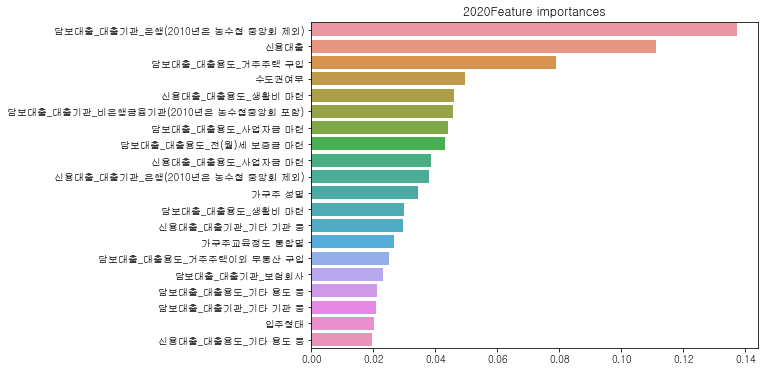

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

ftr_importances_values = dt_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )


#한글폰트 적용
path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)


# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('2020Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# LightGBM, SMOTE

In [38]:
df = pd.read_csv('./data/2020가계부채/data_fin.csv', engine='python',encoding='cp949')
df=df.drop(columns='Unnamed: 0')
df

,담보대출,담보대출_대출용도_거주주택 구입,담보대출_대출용도_거주주택이외 부동산 구입,담보대출_대출용도_전(월)세 보증금 마련,담보대출_대출용도_부채상환,담보대출_대출용도_사업자금 마련,담보대출_대출용도_생활비 마련,담보대출_대출용도_기타 용도 등,담보대출_대출기관_은행(2010년은 농수협 중앙회 제외),담보대출_대출기관_저축은행,...,신용대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함),신용대출_대출기관_보험회사,신용대출_대출기관_기타 기관 등,가구주 성별,가구주교육정도 통합별,가구주 혼인상태,입주형태,수도권여부,가구주 직업(대분류),부실가계
0,10000.0,0,0.0,10000,0,0.0,0,0.0,10000.0,0,...,0,0,0,0,1,1,0,1,0,0
1,9500.0,0,0.0,0,0,9500.0,0,0.0,9500.0,0,...,0,0,0,1,1,1,0,1,0,1
2,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
3,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,0,0,0,1,0,1,0,0
4,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18059,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,2200,0,1,1,0,0,0,0
18060,22000.0,22000,0.0,0,0,0.0,0,0.0,7000.0,15000,...,0,0,0,0,1,1,1,0,0,0
18061,8000.0,8000,0.0,0,0,0.0,0,0.0,8000.0,0,...,0,0,0,0,1,1,1,0,0,0
18062,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,0,1,1,0,0,0,0,0


In [40]:
X = df.iloc[:,1:-1]
Y = df.iloc[:,-1]

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=369)

# 학습과 테스트 데이터 셋으로 분리

X_train , X_test , y_train , y_test = train_test_split(X, Y,
                                                       test_size=0.3,  random_state=11)

dt_clf.fit(X_train , y_train)

pred = dt_clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [43]:
# df.info()

In [44]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    94.819677
1     5.180323
Name: 부실가계, dtype: float64
테스트 데이터 레이블 값 비율
0    94.667897
1     5.332103
Name: 부실가계, dtype: float64


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# DecisionTree Classifier 생성
lr_clf = DecisionTreeClassifier(random_state=369)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, lr_pred)


오차 행렬
[[4962  169]
 [ 261   28]]
정확도: 0.9207, 정밀도: 0.1421, 재현율: 0.0969,    F1: 0.1152, AUC:0.5320


In [47]:
from sklearn.linear_model import LogisticRegression


lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, lr_pred)

오차 행렬
[[5093   38]
 [ 278   11]]
정확도: 0.9417, 정밀도: 0.2245, 재현율: 0.0381,    F1: 0.0651, AUC:0.5153


In [48]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    get_clf_eval(tgt_test, pred)

In [49]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[5049   82]
 [ 273   16]]
정확도: 0.9345, 정밀도: 0.1633, 재현율: 0.0554,    F1: 0.0827, AUC:0.5197


<AxesSubplot:>

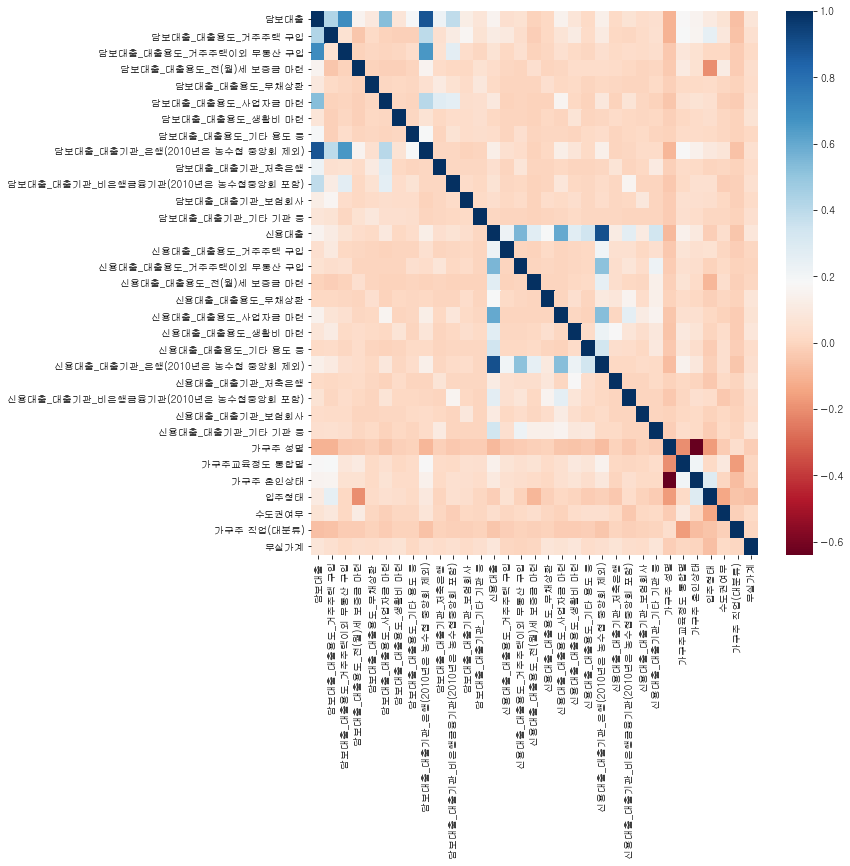

In [50]:
import seaborn as sns

plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, cmap='RdBu')

# 이상치 제거

In [52]:
# sns.boxplot(data=df['HDRI'],color='red')
# plt.show

# SMOTE

In [54]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=369)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (12644, 31) (12644,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (23978, 31) (23978,)
SMOTE 적용 후 레이블 값 분포: 
 0    11989
1    11989
Name: 부실가계, dtype: int64


In [56]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    

In [55]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[3241 1890]
 [  73  216]]
정확도: 0.6378, 정밀도: 0.1026, 재현율: 0.7474,    F1: 0.1804, AUC:0.6895


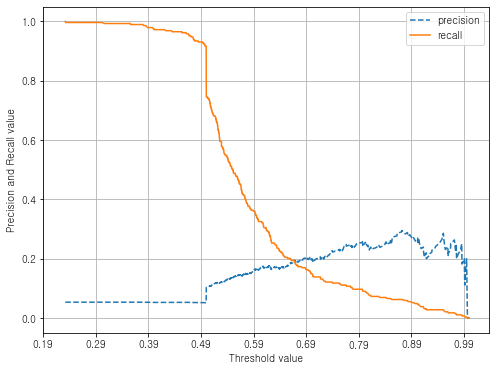

In [57]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# DecisionTree Classifier 생성
dtc_clf = DecisionTreeClassifier(random_state=369)
get_model_train_eval(dtc_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[4597  534]
 [ 222   67]]
정확도: 0.8605, 정밀도: 0.1115, 재현율: 0.2318,    F1: 0.1506, AUC:0.5639


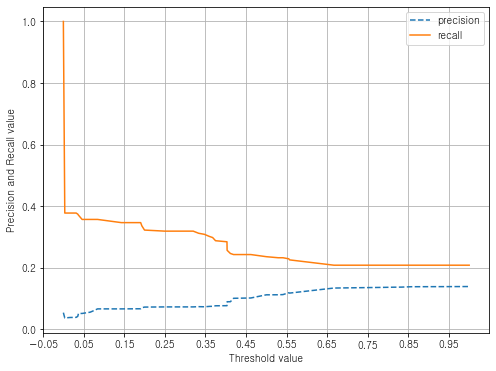

In [64]:
precision_recall_curve_plot( y_test, dtc_clf.predict_proba(X_test)[:, 1] )

In [58]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[4689  442]
 [ 238   51]]
정확도: 0.8745, 정밀도: 0.1034, 재현율: 0.1765,    F1: 0.1304, AUC:0.5452


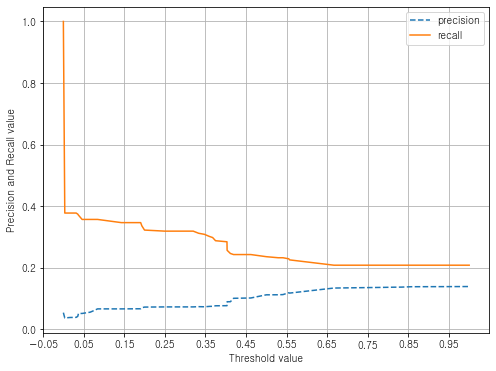

In [69]:
precision_recall_curve_plot( y_test, lgbm_clf.predict_proba(X_test)[:, 1] )

In [71]:


# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.202049
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.197496
[3]	valid_0's binary_logloss: 0.194197
[4]	valid_0's binary_logloss: 0.191721
[5]	valid_0's binary_logloss: 0.189986
[6]	valid_0's binary_logloss: 0.188549
[7]	valid_0's binary_logloss: 0.186988
[8]	valid_0's binary_logloss: 0.186075
[9]	valid_0's binary_logloss: 0.185445
[10]	valid_0's binary_logloss: 0.184715
[11]	valid_0's binary_logloss: 0.184317
[12]	valid_0's binary_logloss: 0.184003
[13]	valid_0's binary_logloss: 0.183447
[14]	valid_0's binary_logloss: 0.183354
[15]	valid_0's binary_logloss: 0.183113
[16]	valid_0's binary_logloss: 0.182776
[17]	valid_0's binary_logloss: 0.182508
[18]	valid_0's binary_logloss: 0.182056
[19]	valid_0's binary_logloss: 0.181787
[20]	valid_0's binary_logloss: 0.181709
[21]	valid_0's binary_logloss: 0.181561
[22]	valid_0's binary_logloss: 0.18124
[23]	valid_0's binary_logloss: 0.181272
[24]	valid_0's binary_loglos

In [73]:
get_clf_eval(y_test, preds)

오차 행렬
[[5127    4]
 [ 286    3]]
정확도: 0.9465, 정밀도: 0.4286, 재현율: 0.0104,    F1: 0.0203, AUC:0.5048


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

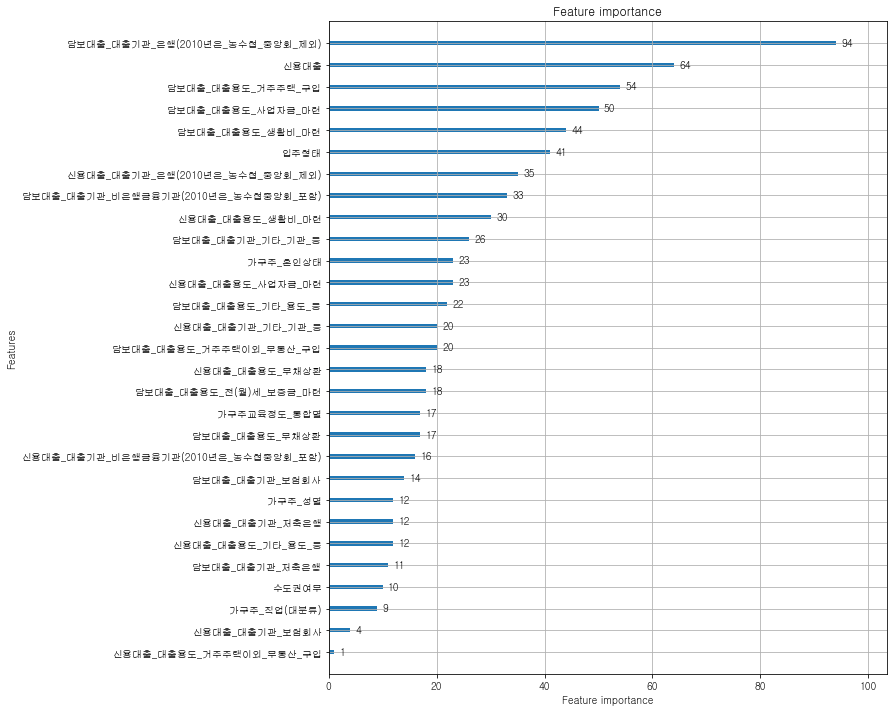

In [77]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

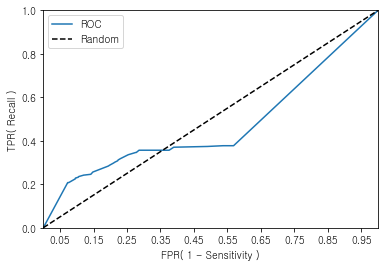

In [80]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lgbm_clf.predict_proba(X_test)[:, 1] )


In [81]:
X_train

,담보대출_대출용도_거주주택 구입,담보대출_대출용도_거주주택이외 부동산 구입,담보대출_대출용도_전(월)세 보증금 마련,담보대출_대출용도_부채상환,담보대출_대출용도_사업자금 마련,담보대출_대출용도_생활비 마련,담보대출_대출용도_기타 용도 등,담보대출_대출기관_은행(2010년은 농수협 중앙회 제외),담보대출_대출기관_저축은행,담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함),...,신용대출_대출기관_저축은행,신용대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함),신용대출_대출기관_보험회사,신용대출_대출기관_기타 기관 등,가구주 성별,가구주교육정도 통합별,가구주 혼인상태,입주형태,수도권여부,가구주 직업(대분류)
17764,6000,0.0,0,0,0.0,0,0.0,6000.0,0,0.0,...,0,5000,0,0,0,1,1,1,0,0
352,0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0,0,0,0,1,0,0,0,1,0
719,0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0,0,0,0,0,1,1,1,0,0
1440,0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0,0,0,0,1,0,0,0,0,0
11715,0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17677,0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0,0,0,0,0,1,1,1,0,0
4023,0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0,0,0,0,0,1,1,1,1,0
7259,0,0.0,0,0,30000.0,0,0.0,30000.0,0,0.0,...,0,0,0,0,0,1,1,0,1,0
3775,0,0.0,0,0,9816.0,0,0.0,0.0,0,9816.0,...,0,0,0,0,1,0,1,1,1,0


In [89]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
import os

from sklearn import datasets
import pickle
from sklearn.externals import joblib

In [86]:
with open('models/exam_grade_classification_model/model.pkl', 'wb') as f:
    pickle.dump(model, f)

model = DecisionTreeClassifier(random_state=369)
y_predict = model.predict(X_test)

label = labels[y_predict[0]]
y_predict = model.predict_proba(x_test)
confidence = y_predict[0][y_predict[0].argmax()]

print(label, confidence) #

NameError: name 'model' is not defined

In [111]:
clf_from_joblib = joblib.load('model.pkl') 
pred= clf_from_joblib.predict(X)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
dtc_clf = DecisionTreeClassifier(random_state=369)
get_model_train_eval(dtc_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

In [109]:
model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    get_clf_eval(tgt_test, pred)

DecisionTreeClassifier(random_state=369)

In [117]:
xxx = data['부실가계']==pred
xxx

0         True
1        False
2         True
3         True
4         True
         ...  
18059     True
18060     True
18061     True
18062     True
18063     True
Name: 부실가계, Length: 18064, dtype: bool

In [123]:
yyy = xxx.value_counts()
print('error:',yyy[0]/yyy[1])
print('good:',(yyy[1]-yyy[0])/yyy[1])

error: 0.08213023422991673
good: 0.9178697657700833
